<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-dsercam/blob/main/DataAnalysisWithPython/Module4_A01182676.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<font color="darkblue">Data Analysis with Python (IBM)</font>**
##**<font color="darkorange"> Module 4: Notes and exercises Jupyter Notebook</font>**

###**Maestría en Inteligencia Artificial Aplicada**
###**Curso: Ciencia y analítica de datos**
####**Tecnológico de Monterrey**
#####**Prof: María de la Paz Rico Fernández**

###**<font color="darkgray">Nombre del estudiante: Dante Rodrigo Serna Camarillo</font>**
###**<font color="darkgray">Matrícula: A01182676</font>**

### <b><font color="darkpurple">1. MODEL DEVELOPMENT</font></b>

- Model/estimator can be described as a mathematical expression used to predict a value.
- This is achived by relating independent variables to dependent variables. For example, calculating a car value given its mpg.
- Relvant data produces more accurate predicitons.
<br><br>
<font color="darkpurple">Models covered in this module:</font>
- Simple linear Regressions
- Multiple Linear regression
- Polynomial Regression


In [62]:
# Get the CSV to perform some examples
import pandas as pd 
import numpy as np
csv_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
masterDataFrame = pd.read_csv(csv_path, skipinitialspace=True, header=None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
masterDataFrame.columns = headers
masterDataFrame.replace("?",0, inplace=True)
masterDataFrame["price"] = masterDataFrame["price"].astype("float")
masterDataFrame.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


1.1 Single Linear Regression
- Uses one independent variable to make predictions
- Also known as SLS
<br>
- Use the fit() method to train our model using inputs from our dataframe.
- We usually store our traget variable (y) in one strcuture, and the predictor varaibles in another (x)

In [63]:
#import linear model from sklearn
from sklearn.linear_model import LinearRegression

In [64]:
#Create an object using the constructor
linearModel = LinearRegression()

In [65]:
#define predictor and target variable
X = masterDataFrame[['highway-mpg']]
Y = masterDataFrame['price']

In [66]:
#use the fit method
linearModel.fit(X,Y)

LinearRegression()

In [67]:
#We can use the predict method
yHat = linearModel.predict(X)

In [68]:
#we can review the slope and intercept calculated by the model
print('Slope as > ',linearModel.coef_)
print('Intercept as > ',linearModel.intercept_)

Slope as >  [-806.76723574]
Intercept as >  37758.50562969372


The relationship between highway-mpg and price can then be expressed like:
<br><br>
<b><font color="darkpurple"> y= 37758.506 - 806.767x </font></b>
<br> Where x is highway-mpg

1.2 Multiple Linear Regression
- Uses multiple indepenedent variables to calculate predicitons.
- One continous target variable (y)
- Two or more predictor variables (x)

In [69]:
#for example extract four predictor variables
Z = masterDataFrame[['horsepower','curb-weight','engine-size','highway-mpg']]
Y = masterDataFrame['price']

In [70]:
#train the model again, using the multiple predictor variables this time
linearModel.fit(Z,Y)

LinearRegression()

In [71]:
#we can also review the calcualted intercept and coefficients (one per each feature/predictor variable)
print('Coefficients as > ',linearModel.coef_)
print('Intercept as > ',linearModel.intercept_)

Coefficients as >  [  -4.52518033    3.11063687  113.42306658 -174.59226569]
Intercept as >  -3558.1248837676358


The relationship can then be expressed like:
<br><br>
<b><font color="darkpurple"> y= 3558.125 - -4.525(Horsepower) + 3.110(curb-weight) + 113.423(engine-size) -174.592(highway-mpg) </font></b>


### <b><font color="darkpurple">2. MODEL EVALUATION USING VISUALIZATION</font></b>

- The horizontal axis is usually the indepenednt variable
- The vertical axis is usually the target variable



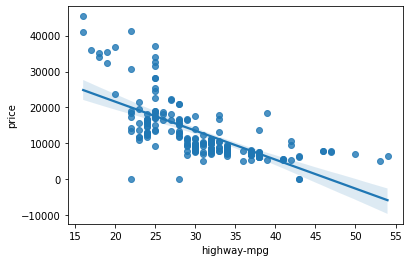

In [72]:
#import libraries
import seaborn as sns

sns.regplot(x='highway-mpg', y='price', data=masterDataFrame)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


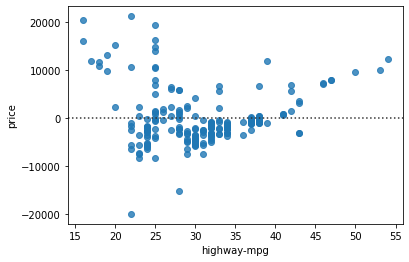

In [73]:
#we can use residual plots 
sns.residplot(masterDataFrame['highway-mpg'],masterDataFrame['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


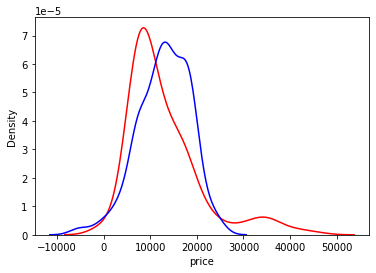

In [74]:
#distribution plots are useful for models with more than one independe variable
ax1 = sns.distplot(masterDataFrame['price'], hist=False, color='r', label='Actual Value')
sns.distplot(yHat, hist=False, color='b', label='Fitted Values', ax=ax1)

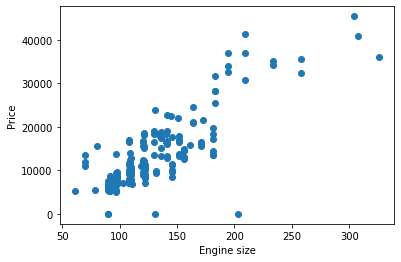

In [75]:
import matplotlib.pyplot as plt 
x = masterDataFrame['engine-size']
y = masterDataFrame['price']
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.scatter(x,y)


### <b><font color="darkpurple">3. Polynomial Regression and pipelines</font></b>

- When simpler models - linear regression- is not enoough for a performant model.
- Helpful for describing curvilinear relationships.
- Classified in 'orders' (cuadratic, cubic, 4th order, nth order ....)


In [76]:
#lets use a cubic/3rd order polynomial model for our data
import numpy as np
f = np.polyfit(x,y,3)
p = np.poly1d(f)

In [77]:
#we can then review the reuslting expression
print(p)

           3         2
-0.005261 x + 2.905 x - 319 x + 1.657e+04


In [78]:
#polyfit cannot really handle complex expressions, so we use sklearn
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2, include_bias=False)
x_polly = pr.fit_transform(masterDataFrame[['horsepower','curb-weight']])

In [79]:
#as the dimension of data increases, we probably want to normalize its features
# we can stadradize all features simultaneousley 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#apply it to data
scaler.fit(masterDataFrame[['horsepower','highway-mpg']])
#transform it and set it to a new dataframe
scaledData = scaler.transform(masterDataFrame[['horsepower','highway-mpg']])
scaledData

array([[ 0.19053401, -0.54605874],
       [ 0.19053401, -0.54605874],
       [ 1.24619543, -0.69162706],
       [-0.03041838, -0.10935377],
       [ 0.28873507, -1.27390036],
       [ 0.16598375, -0.83719538],
       [ 0.16598375, -0.83719538],
       [ 0.16598375, -0.83719538],
       [ 0.90249171, -1.565037  ],
       [ 1.39349702, -1.27390036],
       [-0.05496864, -0.25492209],
       [-0.05496864, -0.25492209],
       [ 0.43603667, -0.40049041],
       [ 0.43603667, -0.40049041],
       [ 0.43603667, -0.83719538],
       [ 1.93360286, -1.27390036],
       [ 1.93360286, -1.27390036],
       [ 1.93360286, -1.565037  ],
       [-1.35613271,  3.23871768],
       [-0.81602687,  1.78303445],
       [-0.81602687,  1.78303445],
       [-0.8651274 ,  1.4918978 ],
       [-0.8651274 ,  1.05519283],
       [-0.03041838, -0.10935377],
       [-0.8651274 ,  1.05519283],
       [-0.8651274 ,  1.05519283],
       [-0.8651274 ,  1.05519283],
       [-0.03041838, -0.10935377],
       [-0.37412209,

#### <b><PIPELINES</font></b>
-define multiple steps and execute them ina given order 


In [80]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [81]:
input =[
    ('scale',StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
]

In [82]:
pipe = Pipeline(input)

### <b><font color="darkpurple">Measures for In-Sample evaluation</font></b>
- Evaluate models numerically
- Determine numerically how well does our model fits on our data
- <font color='darkred'>Two important measures are: </font>

- MEAN SQUARED ERROR -> MSE
  - Difference between the predicted value yhat and the actual y value, then square it. Add tsuch value for all the predicted values and then obtain the mean.
- R-SQUARED
  - also know as 'coefficient of determinaiton'
  - how close is our actual data to our estimated model
  - Values between 0 and 1, the closer to zero, the beter.



In [83]:
#we can obtian MSE metric use sklearn
from sklearn.metrics import mean_squared_error
mean_squared_error(masterDataFrame['price'],yHat)

34236681.12989803

In [84]:
#we can find the R-sqaure value by using the score method
X = masterDataFrame[['highway-mpg']]
Y = masterDataFrame['price']
linearModel.fit(X,Y)
linearModel.score(X,Y)

0.47289700751877217

In [85]:
lienarModel = LinearRegression()
Z = masterDataFrame[['highway-mpg']]
Y = masterDataFrame['price']
linearModel.fit(Z,Y)
value = pd.DataFrame([30])
value.columns=['highway-mpg']

linearModel.predict(value)
linearModel.coef_

#the price will decrease per a factor of -806 dollars as the mpg value increases, which makes sense. however at one point the price values will become negatives,
# at first glance that wouldn't make sense, but as scuh scenario is not realistic our model appeasr to ve balid wihtin a range of realistic mpg

array([-806.76723574])

In [94]:
#analyze behavior in a range of unrelaistic values.
new_input = np.arange(1,101,1).reshape(-1,1)
new_input = pd.DataFrame(new_input)
new_input.columns = ['highway-mpg']
#new_input
yhat= linearModel.predict(new_input)

In [ ]:
#import libraries
import seaborn as sns

sns.regplot(x='highway-mpg', y='price', data=masterDataFrame)


In [ ]:
#import libraries
import seaborn as sns

sns.regplot(x='highway-mpg', y='price', data=masterDataFrame)


## <b><font color="darkorange">LAB </font></b>


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
#you will need to download the dataset; if you are running locally, please comment out the following 
masterDataFrame = pd.read_csv(csv_path, skipinitialspace=True, header=None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
masterDataFrame.replace("?",0, inplace=True)
masterDataFrame.columns = headers
masterDataFrame.head()

#
#masterDataFrame["price"] = masterDataFrame["price"].astype("float")
#masterDataFrame.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [106]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [107]:
X = masterDataFrame[['highway-mpg']]
Y = masterDataFrame['price']

In [108]:
lm.fit(X,Y)

LinearRegression()

In [109]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([15975.79026479, 15975.79026479, 16782.55750053, 13555.48855758,
       20009.62644348])

In [110]:
print('Intercept> ',lm.intercept_)
print('Coeficient> ',lm.coef_)

Intercept>  37758.50562969372
Coeficient>  [-806.76723574]


In [ ]:
# Create a linear regression object called "lm1".
lm1 = LinearRegression()

In [113]:
# Train the model using "engine-size" as the independent variable and "price" as the dependent variable?
X = masterDataFrame[['engine-size']]
Y = masterDataFrame['price']
lm1 = LinearRegression()
lm1.fit(X,Y)

LinearRegression()

In [114]:
#Find the slope and intercept of the model
print(lm1.intercept_)
print(lm1.coef_)

-7685.463680714136
[162.59813402]


In [121]:
#about multiple linear regression
#develop a model using these variables as the predictor variables.
Z = masterDataFrame[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm = LinearRegression()
#Fit the linear model using the four above-mentioned variables
lm.fit(Z, masterDataFrame['price'])


LinearRegression()

In [122]:
#Find the slope and intercept of the model
print(lm1.intercept_)
print(lm1.coef_)

-7685.463680714136
[162.59813402]


In [123]:
#Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".
lm2 = LinearRegression()
lm2.fit(masterDataFrame[['normalized-losses','highway-mpg']],masterDataFrame['price'])

LinearRegression()

In [124]:
#Find the coefficient of the model.
lm2.coef_

array([ -17.18194193, -781.89631601])

(0.0, 48155.663379336256)

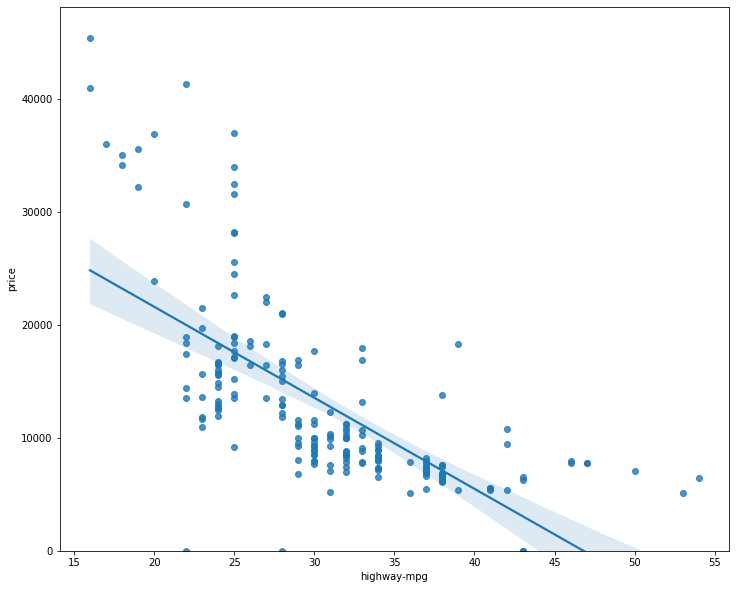

In [128]:
#about visualization
import seaborn as sns
%matplotlib inline 
width = 12
height = 10
plt.figure(figsize=(width, height))
#transform y/price into flaot for it to be graphed correctly.
masterDataFrame["price"] = masterDataFrame["price"].astype("float")
sns.regplot(x='highway-mpg', y='price', data=masterDataFrame)
plt.ylim(0,)

(0.0, 47670.0)

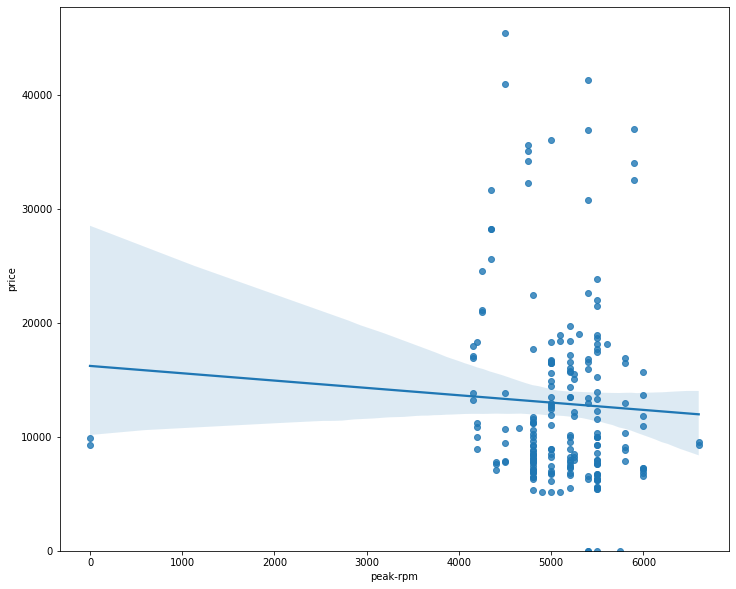

In [130]:
plt.figure(figsize=(width, height))
#transform y/price into flaot for it to be graphed correctly.
masterDataFrame["peak-rpm"] = masterDataFrame["peak-rpm"].astype("float")
sns.regplot(x="peak-rpm", y="price", data=masterDataFrame)
plt.ylim(0,)

In [131]:
#Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.
masterDataFrame[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.039868,-0.055278
highway-mpg,-0.039868,1.000000,-0.687675
price,-0.055278,-0.687675,1.000000


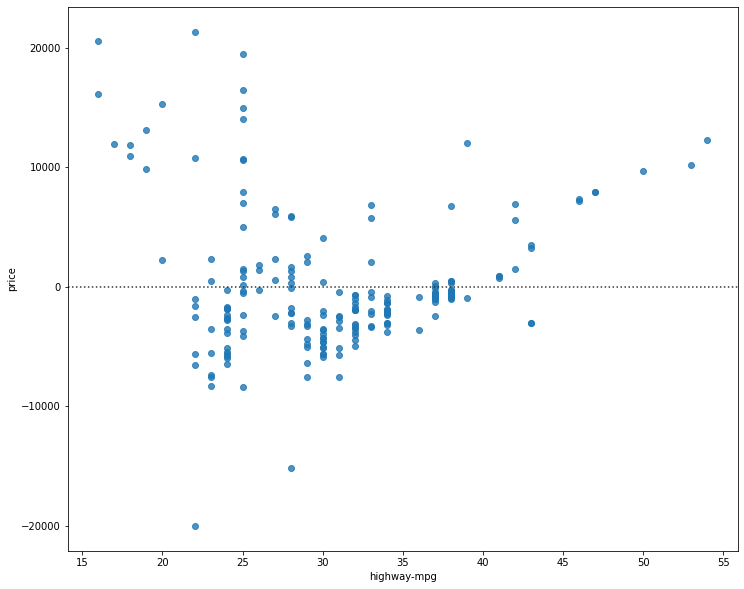

In [132]:
#about residual plots
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=masterDataFrame['highway-mpg'],y=masterDataFrame['price'])
plt.show()
#We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


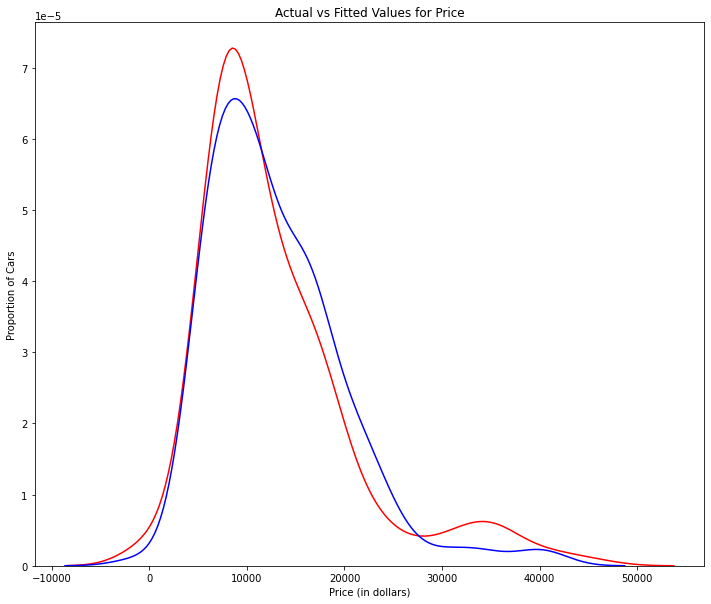

In [134]:
#multiple linear regression
Y_hat = lm.predict(Z)
plt.figure(figsize=(width, height))


ax1 = sns.distplot(masterDataFrame['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [137]:
#polynomial model
#define graph to model results against to actual values
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [138]:
x = masterDataFrame['highway-mpg']
y = masterDataFrame['price']

In [139]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.499 x + 196.9 x - 8639 x + 1.335e+05


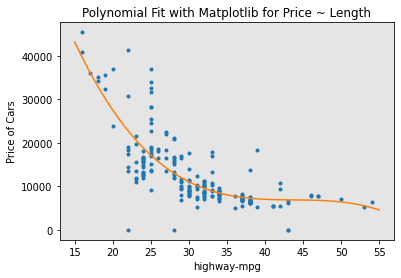

In [140]:
PlotPolly(p, x, y, 'highway-mpg')
#We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.


            11             10             9           8         7
-1.183e-08 x  + 4.476e-06 x  - 0.0007573 x + 0.07555 x - 4.934 x
          6        5             4             3             2
 + 221.3 x - 6947 x + 1.526e+05 x - 2.295e+06 x + 2.251e+07 x - 1.295e+08 x + 3.31e+08


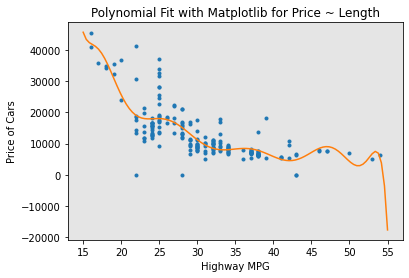

In [141]:
#Create 11 order polynomial model with the variables x and y from above and graph it
f = np.polyfit(x, y,11)
p = np.poly1d(f)
print(p)
PlotPolly(p,x,y,'Highway MPG')

In [142]:
#perform polynomial transform in multiple features
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [145]:
#aplicar la transformacion a las 4 variables que definimos anteriormente
Z_pr=pr.fit_transform(Z)

In [144]:
#pasamos de 4 a 15 features despues de la transformacion
print(Z.shape)
print(Z_pr.shape)

(205, 4)
(205, 15)


## **<font color="darkorange">GRADED REVIEW QUESTIONS - EVIDENCE.</font>**

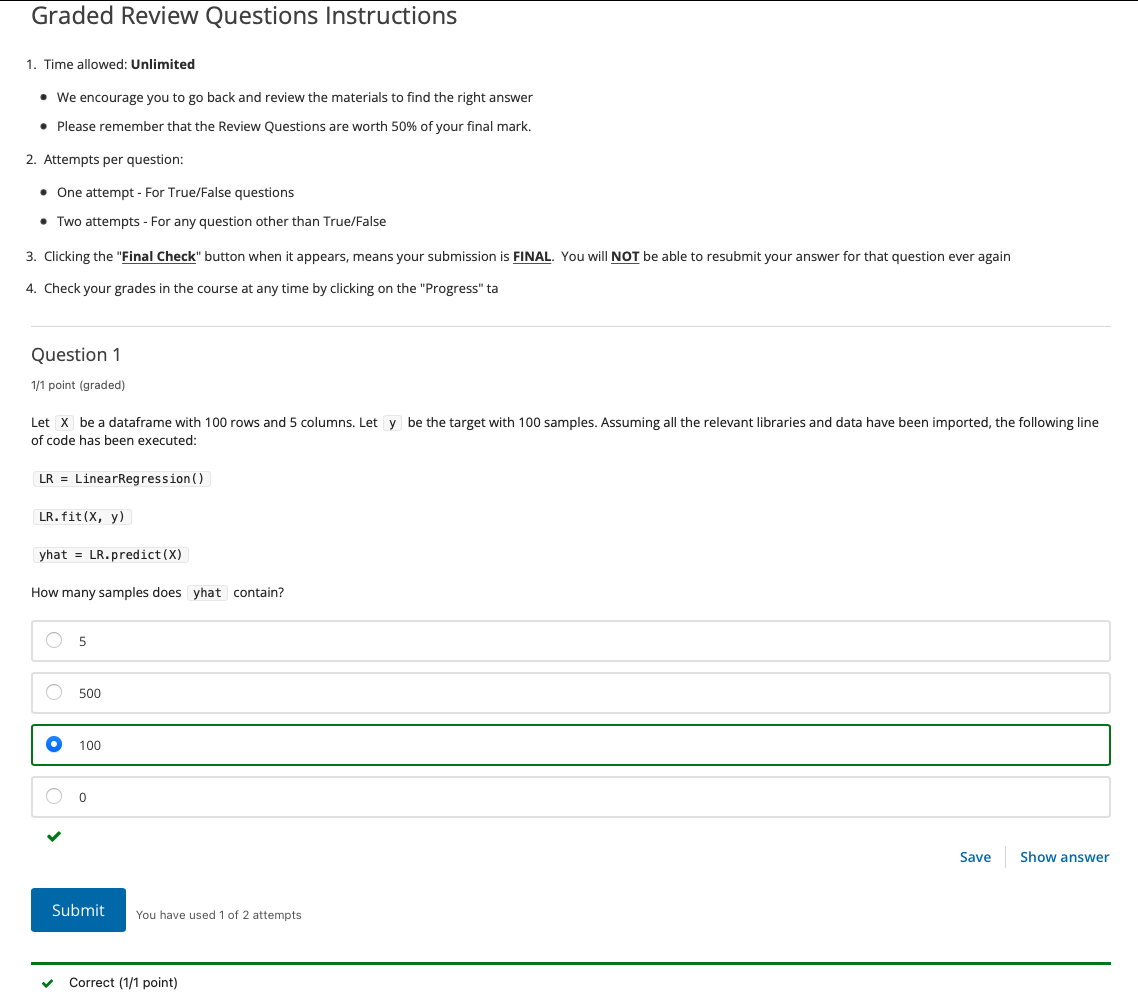

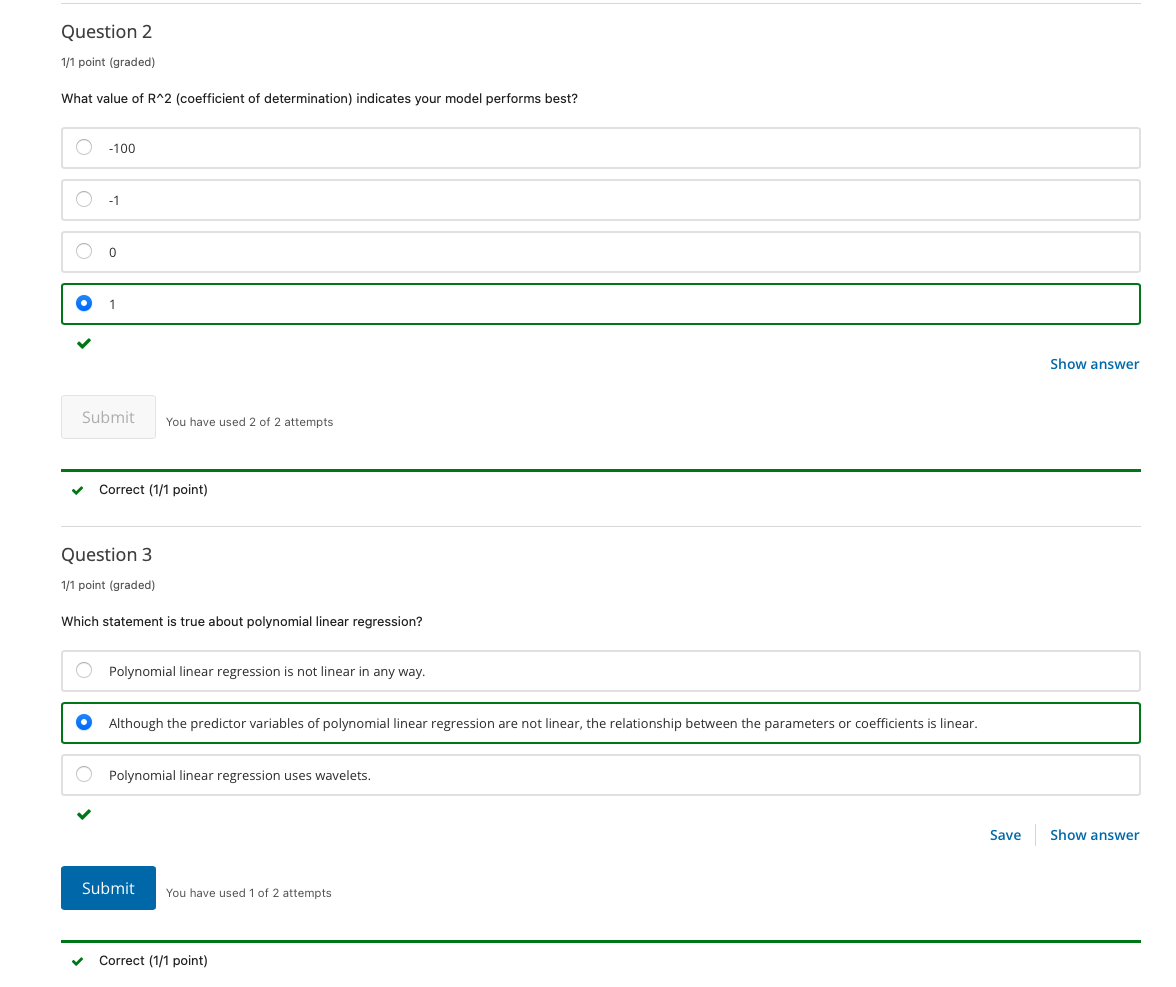

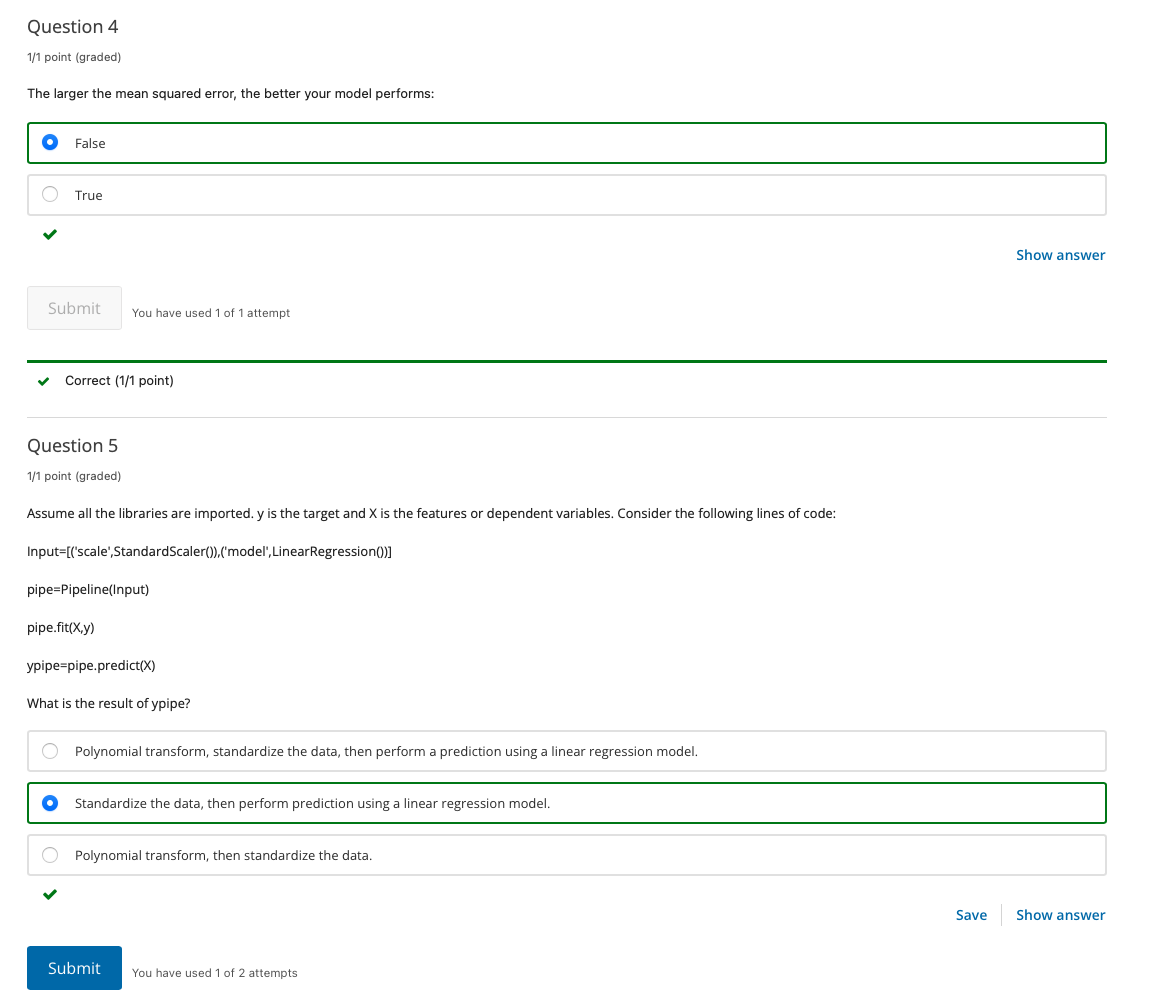

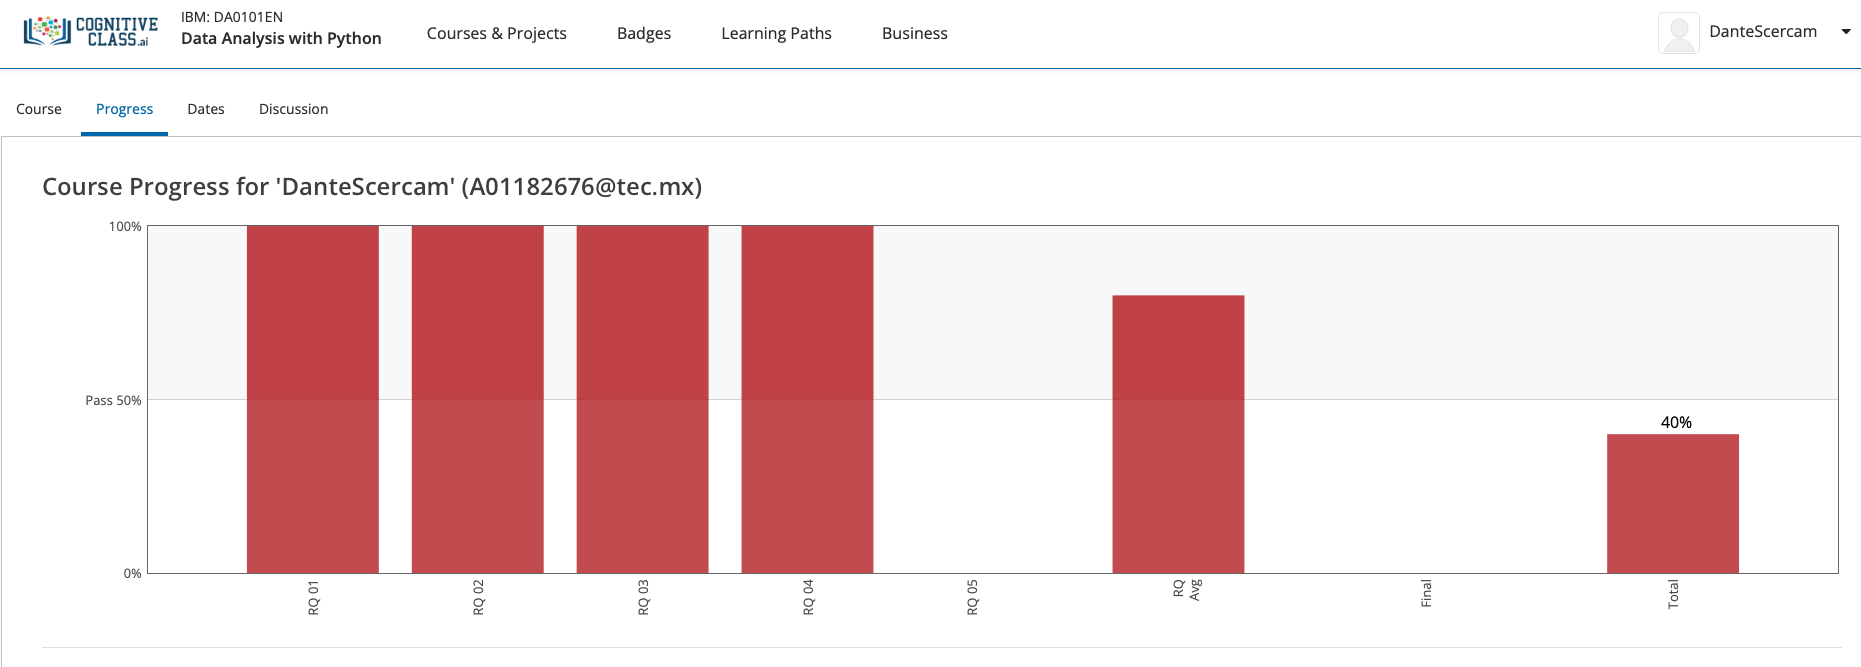